In [20]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 7.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 4.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [46]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.1/520.1 kB 1.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import csv
import warnings
warnings.filterwarnings("ignore")
csv.field_size_limit(1000000000)

1000000000

In [4]:
df = pd.read_csv("state-of-the-union.csv")
df.columns=['year_of_the_speech','text_of_the_speech']

In [5]:
df

year_of_the_speech                                 text_of_the_speech
0                  1790  \nState of the Union Address\nGeorge Washingto...
1                  1791  \nState of the Union Address\nGeorge Washingto...
2                  1792  \nState of the Union Address\nGeorge Washingto...
3                  1793  \nState of the Union Address\nGeorge Washingto...
4                  1794  \nState of the Union Address\nGeorge Washingto...
..                  ...                                                ...
220                2008  \nState of the Union Address\nGeorge W. Bush\n...
221                2009  \nAddress to Joint Session of Congress \nBarac...
222                2010  \nState of the Union Address\nBarack Obama \nJ...
223                2011  \nState of the Union Address\nBarack Obama \nJ...
224                2012  \nState of the Union Address\nBarack Obama \nJ...

[225 rows x 2 columns]

In [6]:
sum(df["text_of_the_speech"].isna())

0

In [7]:
# stop words from assignment description - https://github.com/overview/overview-prototype/blob/master/preprocessing/stopwords-en.csv
stopwords_from_git = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can't", "cannot", "could", "couldn't", "did", "didn't", "do", "does", "doesn't", "doing", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn't", "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "isn't", "it", "it's", "its", "itself", "let's", "me", "more", "most", "mustn't", "my", "myself", "no", "nor", "not", "of", "off", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "shan't", "she", "she'd", "she'll", "she's", "should", "shouldn't", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "wasn't", "we", "we'd", "we'll", "we're", "we've", "were", "weren't", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "won't", "would", "wouldn't", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"]

In [8]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
stopwords.extend(stopwords_from_git)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
import gensim
import re
import pickle
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(t) for t in tokens]

def stemming(tokens):
    stemmer = SnowballStemmer("english")
    return [stemmer.stem(t) for t in tokens]

In [11]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
def preprocess(text):
    
    # tokens
    tokens = nltk.word_tokenize(text.lower())
    tokens = [t for t in tokens if t not in stopwords and t.isalpha()]
    tokens = [t for t in tokens if len(t) > 1] # removing stopwords and punctuations
    
    # lammetize
    lemmatized_tokens = lemmatize(tokens)
    
    # stemming
    stemmed_tokens = stemming(lemmatized_tokens)
    
    return stemmed_tokens

In [13]:
df["processed_speech"] = df.text_of_the_speech.apply(preprocess)

In [14]:
df

year_of_the_speech                                 text_of_the_speech  \
0                  1790  \nState of the Union Address\nGeorge Washingto...   
1                  1791  \nState of the Union Address\nGeorge Washingto...   
2                  1792  \nState of the Union Address\nGeorge Washingto...   
3                  1793  \nState of the Union Address\nGeorge Washingto...   
4                  1794  \nState of the Union Address\nGeorge Washingto...   
..                  ...                                                ...   
220                2008  \nState of the Union Address\nGeorge W. Bush\n...   
221                2009  \nAddress to Joint Session of Congress \nBarac...   
222                2010  \nState of the Union Address\nBarack Obama \nJ...   
223                2011  \nState of the Union Address\nBarack Obama \nJ...   
224                2012  \nState of the Union Address\nBarack Obama \nJ...   

                                      processed_speech  
0    [state, union, address, georg, washington, dec...  
1    [state, union, address, georg, washington, oct...  
2    [state, union, address, georg, washington, nov...  
3    [state, union, address, georg, washington, dec...  
4    [state, union, address, georg, washington, nov...  
..                                                 ...  
220  [state, union, address, georg, bush, januari, ...  
221  [address, joint, session, congress, barack, ob...  
222  [state, union, address, barack, obama, januari...  
223  [state, union, address, barack, obama, januari...  
224  [state, union, address, barack, obama, januari...  

[225 rows x 3 columns]

# tf-idf weight document vectors

In [15]:
import gensim
from gensim import corpora


dictionary = corpora.Dictionary(df["processed_speech"])

# 2nd iteration
bag_of_words = [dictionary.doc2bow(item) for item in df["processed_speech"]]

# tf-idf scores
tf_idf = gensim.models.TfidfModel(bag_of_words)
tf_idf_corpus = tf_idf[bag_of_words]

tf_idf_corpus[0][0]

(0, 0.01120939809115203)

# LSI

Coherence is a measure used to evaluate the interpretability and coherence of topics generated by topic modeling algorithms like Latent Semantic Indexing (LSI), Latent Dirichlet Allocation (LDA), and others. Coherence is a measure used to evaluate the interpretability and coherence of topics generated by topic modeling algorithms like Latent Semantic Indexing (LSI), Latent Dirichlet Allocation (LDA), and others. In the context of topic modeling, coherence measures assess the degree of semantic similarity between high-scoring words within the same topic. A higher coherence score indicates that the words within a topic tend to co-occur together in the corpus, suggesting that the topic is more coherent and interpretable.  
Will try different values for number of topics and check coherence value

In [17]:
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

In [27]:
# trying topic range 5-30
start_topics = 5
end_topics = 30
step_size = 5
num_topics_list = list(range(start_topics, end_topics + 1, step_size))

best_coherence_value = float('-inf')
best_lsi_model = None

coherence_scores = []

for num_topics in num_topics_list:
    # training
    lsi_model = LsiModel(tf_idf_corpus, id2word=dictionary, num_topics=num_topics, chunksize=100, decay=0.5, random_seed=24)
    
    # coherence score
    coherence_model = CoherenceModel(model=lsi_model, texts=df["processed_speech"], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    
    coherence_scores.append(coherence_score)
    
    # save the best model
    if coherence_score > best_coherence_value:
        best_coherence_value = coherence_score
        best_lsi_model = lsi_model

# optimal number of topics
best_num_topics = num_topics_list[coherence_scores.index(max(coherence_scores))]

print("Coherence scores for each number of topics:", coherence_scores)
print("Best number of topics:", best_num_topics)


Coherence scores for each number of topics: [0.541425728334292, 0.41568350780420094, 0.3914265843470043, 0.3883674108732783, 0.3796490520250867, 0.38540985279640216]
Best number of topics: 5


In [35]:
lsi_topics = best_lsi_model.print_topics(num_topics=5, num_words=20)
lsi_topics

[(0,
  '0.209*"tonight" + 0.186*"job" + 0.157*"child" + 0.147*"help" + 0.130*"program" + 0.129*"school" + 0.123*"budget" + 0.120*"america" + 0.115*"terrorist" + 0.114*"cut" + 0.109*"iraq" + 0.104*"let" + 0.095*"spend" + 0.095*"colleg" + 0.091*"challeng" + 0.088*"get" + 0.084*"know" + 0.083*"today" + 0.082*"tax" + 0.081*"deficit"'),
 (1,
  '-0.294*"terrorist" + -0.230*"iraq" + -0.200*"iraqi" + -0.132*"terror" + -0.122*"tonight" + -0.110*"al" + 0.103*"program" + -0.094*"afghanistan" + -0.087*"qaeda" + -0.085*"regim" + -0.073*"saddam" + -0.071*"child" + 0.071*"econom" + 0.071*"agricultur" + 0.068*"farm" + 0.066*"interst" + -0.062*"hussein" + 0.062*"problem" + 0.062*"corpor" + -0.060*"america"'),
 (2,
  '0.319*"terrorist" + 0.220*"iraq" + 0.209*"iraqi" + -0.151*"job" + 0.145*"terror" + -0.126*"colleg" + -0.119*"cut" + 0.110*"regim" + 0.108*"al" + 0.103*"afghanistan" + -0.101*"child" + -0.095*"school" + -0.093*"parent" + -0.089*"get" + 0.084*"enemi" + -0.079*"challeng" + -0.079*"deficit" + 

## We will use 10 since we need at least 10 topics and it has the 2nd best coherence value 

In [18]:
target_lsi_model = LsiModel(tf_idf_corpus, 
                            id2word=dictionary, 
                            num_topics=10, 
                            chunksize=100,  
                            decay=0.5, 
                            random_seed=24)

# topics
lsi_topics = target_lsi_model.print_topics(num_topics=10, num_words=20)
lsi_topics

[(0,
  '0.209*"tonight" + 0.185*"job" + 0.157*"child" + 0.147*"help" + 0.129*"school" + 0.129*"program" + 0.123*"budget" + 0.121*"america" + 0.115*"terrorist" + 0.114*"cut" + 0.108*"iraq" + 0.104*"let" + 0.096*"spend" + 0.094*"colleg" + 0.091*"challeng" + 0.088*"get" + 0.084*"know" + 0.083*"today" + 0.082*"tax" + 0.081*"deficit"'),
 (1,
  '-0.290*"terrorist" + -0.227*"iraq" + -0.196*"iraqi" + -0.131*"terror" + -0.121*"tonight" + -0.109*"al" + 0.107*"program" + -0.094*"afghanistan" + -0.085*"regim" + -0.083*"qaeda" + -0.077*"saddam" + -0.072*"child" + 0.071*"econom" + 0.070*"agricultur" + 0.069*"farm" + 0.068*"interst" + -0.067*"hussein" + 0.063*"corpor" + 0.062*"problem" + -0.059*"america"'),
 (2,
  '-0.323*"terrorist" + -0.223*"iraq" + -0.212*"iraqi" + 0.151*"job" + -0.147*"terror" + 0.125*"colleg" + 0.118*"cut" + -0.111*"regim" + -0.109*"al" + -0.104*"afghanistan" + 0.100*"child" + 0.094*"school" + 0.093*"parent" + 0.089*"get" + -0.085*"enemi" + 0.080*"deficit" + 0.079*"let" + 0.078*

In [33]:
def generate_topic_description(topic):
    # split the topic, will need to split by + and then *
    topic_terms = topic[1].split(" + ")
    # keywords and weights
    topic_keywords = [(term.split("*")[1][1:-1], float(term.split("*")[0])) for term in topic_terms]
    # sort based on weight
    sorted_keywords = sorted(topic_keywords, key=lambda x: abs(x[1]), reverse=True)
    # keeping top 10
    top_keywords = [keyword for keyword, weight in sorted_keywords[:10]]  
    # generating description, may not be well descriptive
    topic_description = "This topic is about " + ", ".join(top_keywords) + "."
    
    return topic_description

## Won't need to randomly select 10 topics cause i have 10 topics to start with, will use the function generate_topic_description() to generate automated description which may not be very clear but I will add that anyway. Also will provide my own topic description

In [45]:
# lsi_topics = random.sample(lsi_topics, 10)

# topic 0 : economic crisis

In [35]:
lsi_topics[0]

(0,
 '0.209*"tonight" + 0.185*"job" + 0.157*"child" + 0.147*"help" + 0.129*"school" + 0.129*"program" + 0.123*"budget" + 0.121*"america" + 0.115*"terrorist" + 0.114*"cut" + 0.108*"iraq" + 0.104*"let" + 0.096*"spend" + 0.094*"colleg" + 0.091*"challeng" + 0.088*"get" + 0.084*"know" + 0.083*"today" + 0.082*"tax" + 0.081*"deficit"')

In [34]:
generate_topic_description(lsi_topics[0])

'This topic is about tonight, job, child, help, school, program, budget, america, terrorist, cut.'

Topic 0 could be about American economy and employment conditions.It also covers the education system, addresses possible security crisis including Iraq war and terrorism. Lastly, the topic may also elucidate the challenging economical conditions and a possible tax cut program or a tax deficit situation.

# topic 1 : Invasion of Iraq

In [20]:
lsi_topics[1]

(1,
 '-0.290*"terrorist" + -0.227*"iraq" + -0.196*"iraqi" + -0.131*"terror" + -0.121*"tonight" + -0.109*"al" + 0.107*"program" + -0.094*"afghanistan" + -0.085*"regim" + -0.083*"qaeda" + -0.077*"saddam" + -0.072*"child" + 0.071*"econom" + 0.070*"agricultur" + 0.069*"farm" + 0.068*"interst" + -0.067*"hussein" + 0.063*"corpor" + 0.062*"problem" + -0.059*"america"')

In [36]:
generate_topic_description(lsi_topics[1])

'This topic is about terrorist, iraq, iraqi, terror, tonight, al, program, afghanistan, regim, qaeda.'

Topic 1 could be about the challenges posed by terrorism, with a specific focus on Iraq and Afghanistan. It addresses terrorist activities, including Al-Qaeda and their affiliates. The topic underscores the ongoing security threats and conflicts in Iraq and Afghanistan, highlighting the political regime in Iraq and its possible association with terrorism. Lastly, the mention of economic terms such as "economy" and "agriculture" may indicate the broader socio-economic impacts of terrorism.

# topic 2 : Impact of the Iraq war, economic crisis and threats from other extremist groups

In [21]:
lsi_topics[2]

(2,
 '-0.323*"terrorist" + -0.223*"iraq" + -0.212*"iraqi" + 0.151*"job" + -0.147*"terror" + 0.125*"colleg" + 0.118*"cut" + -0.111*"regim" + -0.109*"al" + -0.104*"afghanistan" + 0.100*"child" + 0.094*"school" + 0.093*"parent" + 0.089*"get" + -0.085*"enemi" + 0.080*"deficit" + 0.079*"let" + 0.078*"challeng" + 0.076*"teacher" + -0.076*"qaeda"')

In [37]:
generate_topic_description(lsi_topics[2])

'This topic is about terrorist, iraq, iraqi, job, terror, colleg, cut, regim, al, afghanistan.'

Topic 2 could focus on the challenges posed by terrorism, particularly in Iraq and Afghanistan. It addresses terrorist activities, including the presence of groups like Al-Qaeda, and underscores the ongoing security threats and conflicts in the region. Additionally, the topic may touch upon economic concerns such as job cuts and deficits, as well as issues related to education, including college, schools, and parents.

# topic 3 : Post cold war economy and Gulf war

In [22]:
lsi_topics[3]

(3,
 '0.206*"job" + -0.173*"program" + -0.120*"soviet" + 0.118*"qaeda" + -0.111*"saddam" + -0.109*"budget" + 0.108*"compani" + 0.106*"colleg" + -0.101*"communist" + 0.101*"get" + -0.099*"drug" + 0.096*"ca" + 0.096*"innov" + 0.094*"clean" + 0.089*"iraqi" + -0.089*"billion" + 0.086*"deficit" + -0.084*"weapon" + 0.083*"al" + 0.081*"iraq"')

In [38]:
generate_topic_description(lsi_topics[3])

'This topic is about job, program, soviet, qaeda, saddam, budget, compani, colleg, communist, get.'

Topic 3 appears to center around job opportunities, economic innovation, and education. It emphasizes the importance of fostering innovation, entrepreneurship, and workforce development. Additionally, the topic mentions "communism", "soviet", "iraq" and "saddam", so the topic is probably addressing post cold war job, education and econmoy sector and the Iraq war.

# topic 4 : Education program and economic challenges

In [23]:
lsi_topics[4]

(4,
 '0.205*"child" + -0.171*"program" + 0.155*"school" + 0.152*"parent" + 0.142*"medicar" + -0.123*"job" + 0.107*"challeng" + 0.106*"teacher" + -0.102*"soviet" + -0.102*"spend" + 0.099*"bipartisan" + 0.094*"gun" + 0.091*"internet" + 0.089*"bosnia" + -0.089*"oil" + 0.088*"drug" + 0.086*"colleg" + 0.085*"thank" + -0.078*"communist" + 0.078*"grade"')

In [39]:
generate_topic_description(lsi_topics[4])

'This topic is about child, program, school, parent, medicar, job, challeng, teacher, soviet, spend.'

Topic 4 appears to center around education, healthcare, and bipartisan efforts. It emphasizes the importance of addressing challenges in education and healthcare, highlighting the roles of schools, parents, and teachers. Additionally, it touches on broader societal issues such as gun control and drug policies.

# topic 5 : Iraq war and return of the troops

In [24]:
lsi_topics[5]

(5,
 '0.251*"iraq" + 0.221*"iraqi" + -0.216*"terrorist" + -0.194*"islam" + -0.159*"tonight" + -0.156*"afghanistan" + -0.153*"terror" + 0.128*"qaeda" + 0.128*"al" + -0.120*"camp" + -0.116*"muslim" + -0.099*"regim" + 0.095*"extremist" + -0.079*"kid" + -0.076*"homeland" + 0.074*"medicar" + -0.074*"taliban" + 0.073*"saddam" + -0.073*"grief" + 0.068*"program"')

In [40]:
generate_topic_description(lsi_topics[5])

'This topic is about iraq, iraqi, terrorist, islam, tonight, afghanistan, terror, qaeda, al, camp.'

Topic 5 revolves around the Iraq war and terrorism, with an emphasis on extremist groups like Al-Qaeda. It discusses the challenges posed by terrorism and extremism, touching on related topics like Afghanistan and extremist ideologies. It may also address the returning troops from the Iraqi war and programs to help them.

# topic 6 : Gulf war

In [25]:
lsi_topics[6]

(6,
 '-0.304*"saddam" + -0.200*"hussein" + 0.159*"terrorist" + -0.137*"iraq" + -0.124*"tonight" + -0.112*"gulf" + -0.108*"kid" + -0.104*"persian" + 0.096*"islam" + -0.085*"addict" + -0.084*"tell" + 0.084*"afghanistan" + 0.083*"terror" + -0.082*"drug" + -0.077*"homebuy" + -0.075*"markwel" + 0.073*"program" + -0.073*"know" + 0.070*"colleg" + -0.069*"kuwait"')

In [41]:
generate_topic_description(lsi_topics[6])

'This topic is about saddam, hussein, terrorist, iraq, tonight, gulf, kid, persian, islam, addict.'

Topic 6 centers around the Gulf War, Saddam Hussein, terrorism, and Afghanistan. It discusses the role of Saddam Hussein in the context of terrorism. Additionally, it touches on Afghanistan and Islamist extremism. 

# topic 7 : Crisis in the middle-east and connection to extrimist ideologies

In [26]:
lsi_topics[7]

(7,
 '0.262*"saddam" + 0.235*"hussein" + -0.148*"qaeda" + -0.146*"tonight" + -0.145*"kid" + 0.117*"qaida" + 0.116*"job" + 0.115*"weapon" + -0.113*"iraqi" + -0.113*"markwel" + 0.109*"senior" + 0.107*"medicar" + 0.104*"inspector" + -0.095*"extremist" + -0.095*"challeng" + 0.094*"regim" + 0.085*"coverag" + 0.083*"disarm" + 0.082*"mentor" + -0.079*"democraci"')

In [42]:
generate_topic_description(lsi_topics[7])

'This topic is about saddam, hussein, qaeda, tonight, kid, qaida, job, weapon, iraqi, markwel.'

Topic 7 centers around Saddam Hussein, weapons, and senior officials. It discusses Hussein's regime, its connection to extremist groups  and possible existence of weapons. Additionally, it mentions senior officials and topics such as Medicare coverage. 

# topic 8 : Budget cuts and economic crisis

In [27]:
lsi_topics[8]

(8,
 '0.216*"cut" + -0.136*"tonight" + 0.130*"coven" + 0.124*"welfar" + -0.106*"school" + -0.105*"clean" + 0.103*"bureaucraci" + -0.101*"energi" + 0.099*"iraqi" + 0.096*"crime" + -0.095*"budget" + -0.092*"teacher" + 0.091*"got" + 0.083*"middl" + 0.081*"explod" + -0.080*"internet" + 0.079*"tell" + 0.079*"parent" + 0.078*"lobbyist" + 0.078*"empow"')

In [43]:
generate_topic_description(lsi_topics[8])

'This topic is about cut, tonight, coven, welfar, school, clean, bureaucraci, energi, iraqi, crime.'

Topic 8 centers around general welfare, bureaucracy, and budget cuts. It discusses issues related to welfare programs and bureaucracy, highlighting concerns about budget cuts and their potential impacts.

# topic 9 : Economic reform/recovery

In [28]:
lsi_topics[9]

(9,
 '-0.164*"budget" + -0.161*"medicar" + -0.160*"steven" + -0.146*"josefina" + -0.141*"mayor" + 0.125*"saddam" + -0.120*"spend" + 0.116*"colleg" + -0.096*"joe" + -0.091*"health" + -0.090*"reform" + -0.087*"laura" + 0.087*"hussein" + 0.086*"challeng" + -0.086*"prescript" + -0.084*"coverag" + 0.084*"job" + -0.083*"tax" + -0.083*"senior" + -0.083*"tell"')

In [44]:
generate_topic_description(lsi_topics[9])

'This topic is about budget, medicar, steven, josefina, mayor, saddam, spend, colleg, joe, health.'

Topic 9 centers around budgetary concerns, Medicare, and college education. It discusses challenges related to budget management, Medicare coverage, senior issues and education reform

# LDA

In [42]:
from gensim.models import LdaModel
# topic range 5-30
start_topics = 5
end_topics = 40
step_size = 5
num_topics_list = list(range(start_topics, end_topics + 1, step_size))

best_coherence_value = float('-inf')
best_lda_model = None

coherence_scores = []

for num_topics in num_topics_list:
    # training
    lda_model = LdaModel(tf_idf_corpus, id2word=dictionary, num_topics=num_topics, chunksize=100, decay=0.5, random_state=24)
    
    # coherence score
    coherence_model = CoherenceModel(model=lda_model, texts=df["processed_speech"], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    
    coherence_scores.append(coherence_score)
    
    # save the model
    if coherence_score > best_coherence_value:
        best_coherence_value = coherence_score
        best_lda_model = lda_model

# optimal number of topics
best_num_topics = num_topics_list[coherence_scores.index(max(coherence_scores))]

print("Coherence scores for each number of topics:", coherence_scores)
print("Best number of topics:", best_num_topics)

Coherence scores for each number of topics: [0.5780446364928712, 0.44288487783390595, 0.4220052795773916, 0.40409611632247994, 0.39080244933014385, 0.37693783023000305, 0.3644938611437885, 0.3707437377368672]
Best number of topics: 5


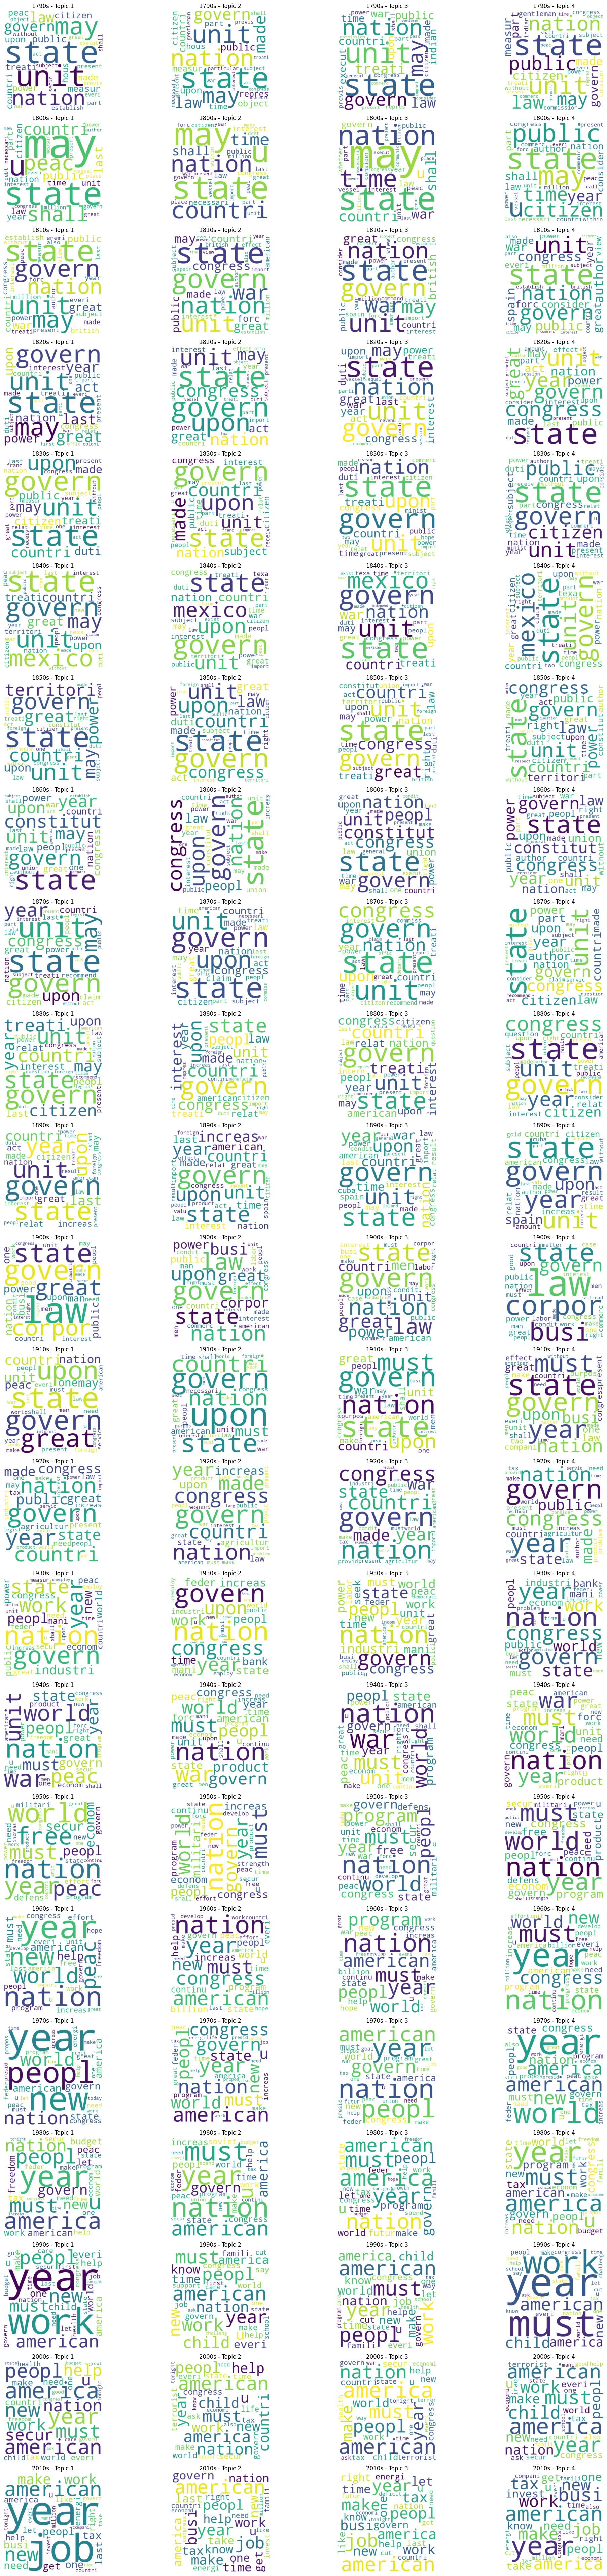

In [47]:
# https://github.com/VinceDiR/sotu_nlp_project

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# using lda
lda_models_by_decade = []
df['decade'] = (df['year_of_the_speech'] // 10) * 10
for decade, group in df.groupby('decade'):
    group_corpus = [dictionary.doc2bow(doc) for doc in group['processed_speech']]
    group_lda_model = LdaModel(group_corpus, id2word=dictionary, num_topics=4, random_state=42)
    lda_models_by_decade.append(group_lda_model)

plt.figure(figsize=(20, 100))
# 
for idx, model in enumerate(lda_models_by_decade):
    for topic in range(4):
        topic_words = dict(model.show_topic(topic, topn=30)) 
        wc = WordCloud(background_color='white', width=400, height=400).generate_from_frequencies(topic_words)
        
        plt.subplot(30, 4, idx*4 + topic + 1)  
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{list(range(1790, 2020, 10))[idx]}s - Topic {topic+1}")

plt.tight_layout()
plt.show()
